In [1]:
import numpy as np
np.random.seed(42)

num_samples = 500

age = np.random.randint(30, 61, num_samples)
salary = np.random.randint(50000, 5000001, num_samples)
family_members = np.random.randint(2, 11, num_samples)
buy_flat = np.random.randint(2, size=num_samples)
random_dataset = np.column_stack((age, salary, family_members, buy_flat))
print(random_dataset[:10])

[[     36 1155534       9       1]
 [     49 3277802       6       0]
 [     58 1633593       5       1]
 [     44 1853649       9       1]
 [     40 1274665       7       0]
 [     37 2344544       3       0]
 [     58 4403127       5       1]
 [     50  548863       5       0]
 [     36  417654       7       0]
 [     55 2726188       7       0]]


In [2]:
import pandas as pd
columns = ['Age', 'Salary', 'Family Members', 'Buy Flat']
df = pd.DataFrame(data=random_dataset, columns=columns)

import matplotlib.pyplot as plt
X = df[['Age', 'Salary', 'Family Members']]
Y = df['Buy Flat']

age_threshold = 40
salary_threshold = 200000
family_members_threshold = 5
df['Age_binary'] = (df['Age'] > age_threshold).astype(int)
df['Salary_binary'] = (df['Salary'] > salary_threshold).astype(int)
df['Family_Members_binary'] = (df['Family Members'] > family_members_threshold).astype(int)

print(df.head())

X=df[['Age_binary', 'Salary_binary', 'Family_Members_binary']]
Y=df[['Buy Flat']]

   Age   Salary  Family Members  Buy Flat  Age_binary  Salary_binary  \
0   36  1155534               9         1           0              1   
1   49  3277802               6         0           1              1   
2   58  1633593               5         1           1              1   
3   44  1853649               9         1           1              1   
4   40  1274665               7         0           0              1   

   Family_Members_binary  
0                      1  
1                      1  
2                      0  
3                      1  
4                      1  


In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, stratify = Y, random_state=1)

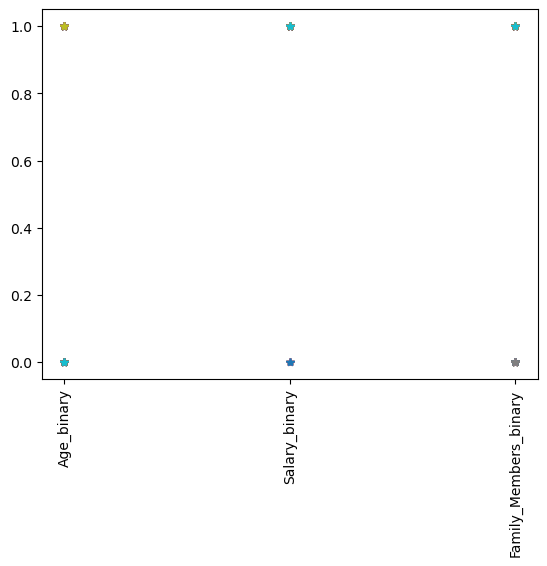

In [4]:
import matplotlib.pyplot as plt
plt.plot(X_test.T, '*')
plt.xticks(rotation='vertical')
plt.show()

In [5]:
X_binarised_train = X_train.apply(pd.cut, bins=2, labels=[1,0])
X_binarised_test = X_test.apply(pd.cut, bins=2, labels=[1,0])

Y_train = Y_train.apply(pd.cut, bins=2, labels=[1,0])
Y_test = Y_test.apply(pd.cut, bins=2, labels=[1,0])

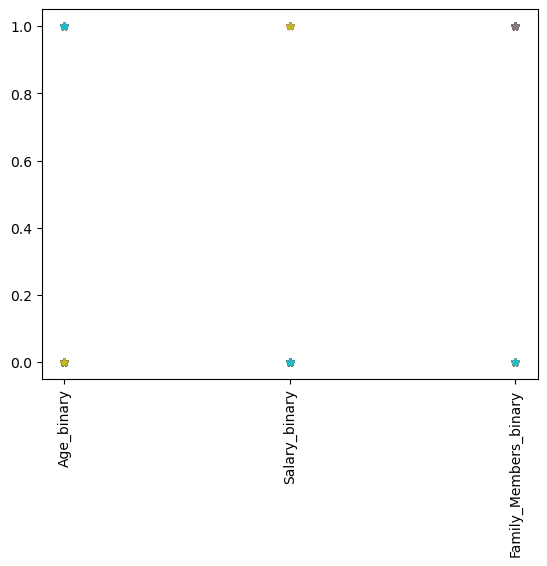

In [6]:
plt.plot(X_binarised_train.T, '*')
plt.xticks(rotation='vertical')
plt.show()

In [7]:
X_binarised_test = X_binarised_test.values
X_binarised_train = X_binarised_train.values
Y_test = Y_test.values
Y_train = Y_train.values

In [8]:
from random import randint
b = 3

i = randint(0, X_binarised_train.shape[0])

print('For row', i)

if i < X_binarised_train.shape[0]:
    if (np.sum(X_binarised_train[i, :]) >= b):
        print('buy a flat')
    else:
        print('not buy a flat')

    if (Y_train[i] == 1):
        print('Ground truth is buy a flat')
    else:
        print('Ground truth is not buy a flat')
else:
    print('Index out of bounds')

For row 0
not buy a flat
Ground truth is not buy a flat


In [9]:
b = 3

Y_pred_train = []
accurate_rows = 0

for x, y in zip(X_binarised_train, Y_train):
  y_pred = (np.sum(x) >= b)
  Y_pred_train.append(y_pred)
  if(y == y_pred):
    accurate_rows += 1
  
print(accurate_rows) 
print(accurate_rows/X_binarised_train.shape[0])

178
0.5085714285714286


In [10]:
for b in range(X_binarised_train.shape[1] + 1):
  Y_pred_train = []
  accurate_rows = 0

  for x, y in zip(X_binarised_train, Y_train):
    y_pred = (np.sum(x) >= b)
    Y_pred_train.append(y_pred)
    if(y == y_pred):
      accurate_rows += 1

  print(b, accurate_rows/X_binarised_train.shape[0])  

0 0.49142857142857144
1 0.44571428571428573
2 0.47714285714285715
3 0.5085714285714286


In [11]:
from sklearn.metrics import accuracy_score

class MPNeuron:
  
  def __init__(self):
    self.b = None
    
  def model(self, x):
    return(sum(x) >= self.b)
  
  def predict(self, X):
    Y = []
    for x in X:
      result = self.model(x)
      Y.append(result)
    return np.array(Y)
  
  def fit(self, X, Y):
    accuracy = {}
    
    for b in range(X.shape[1] + 1):
      self.b = b
      Y_pred = self.predict(X)
      accuracy[b] = accuracy_score(Y_pred, Y)
    best_b = max(accuracy, key = accuracy.get)
    self.b = best_b
    
    print('Optimal value of b is', best_b)
    print('Highest accuracy is', accuracy[best_b])

In [12]:
mp_neuron = MPNeuron()
mp_neuron.fit(X_binarised_train, Y_train)

Optimal value of b is 3
Highest accuracy is 0.5085714285714286


In [13]:
Y_test_pred = mp_neuron.predict(X_binarised_test)
accuracy_test = accuracy_score(Y_test_pred, Y_test)

print(accuracy_test)

0.5066666666666667
